# NLP Text Generation with RNN-LSTM

## Objective

Develop a text generation model for Hindi language using Recurrent Neural Networks (RNNs) with Long Short-Term Memory (LSTM) cells. The model aims to generate coherent and contextually relevant responses based on user input in Hindi. 

The project involves tasks such as:

- Preprocessing text data
- Training an LSTM-based text generation model
- Saving and loading the trained model
- Generating responses with variations based on specified input parameters

Additionally, the project utilizes pre-trained word embeddings and tokenization techniques to enhance the model's performance.

Imports necessary libraries

- **os**: Provides functions for interacting with the operating system.
- **time**: Enables time-related operations.
- **numpy as np**: A widely-used library for numerical computing in Python.
- **tensorflow**: The TensorFlow deep learning framework.
- **Sequential**: Allows for the creation of sequential neural network models in TensorFlow.
- **Dense**: Represents a fully connected layer in a neural network.
- **LSTM**: Stands for Long Short-Term Memory, a type of recurrent neural network (RNN) layer.
- **Tokenizer**: Helps with converting text to sequences of tokens.
- **pad_sequences**: Pads sequences to a specified length.

In [1]:
import os
import time
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Import TensorFlow and check its version

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

# Read Text

Set the variable `folder_path` to the relative path of a directory containing training data for Hindi

In [3]:
folder_path ='./hindi/train/train/'

Let's check by opening one txt file from the folder

In [16]:
text = ''
with open(folder_path+'0.txt', 'r',encoding="utf-8") as f:
    text = f.read()

end=text[31]
text, end

('चैनल एस एक बांग्ला टीवी चैनल है। यह एक मनोरंजन चैनल है।\n', '।')

# Text Processing

Let's collect text from `.txt` files within a specified directory, up to a maximum count defined by `training_file_count`

In [17]:
training_file_count=300

In [18]:
text_data = []
c=0
for filename in os.listdir(folder_path):
    c+=1
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()
            text_data.append(text)
    if c >= training_file_count:
        break
        
full_text = "\n".join(text_data)
text_data

['चैनल एस एक बांग्ला टीवी चैनल है। यह एक मनोरंजन चैनल है।\n',
 'ज़ागान, पश्चिमी पोलैंड में एक शहर है। यह शहर बोबर नदी के किनारे स्थित है। 2004 के जनगणना के अनुसार यहाँ की आबादी 26665 है। यह शहर ज़ागान प्रदेश की राजधानी है।\nअडोल्फ़ एन्ग्लेर रेंहोल्ड रोएहृच्त वोल्फगांग सामुएल लुकस्ज़ गर्गुलअ \n दुन्स, स्कॉटलैंड नेत्फेन, जर्मनी ओरत्रंद, जर्मनी तेल्तो, जर्मनी\n',
 'अभिनव कदम हिन्दी की एक साहित्यिक पत्रिका है। \n अक्षय जीवन · अक्षर पर्व · अक्षय जीवन · अखंड ज्योति · अनंत अविराम · अपरिहार्य · अभिनव कदम · अभिनव बालमन · अभिव्यक्ति · अर्गला · अहा जिंदगी · आकल्प · आज तक · आईबीएन खबर · आई.सी.एम.आर. · आलोचना · आविष्कार · इन.कॉम · इलेक्ट्रॉनिकी आपके लिए · उर्वशी · एनडीटीवी खबर · ओशो टाइम्स · कथाक्रम · कथादेश · कथाबिम्\u200dब · कल्याण · कालदीर्घा · कुरुक्षेत्र · खनन भारती · गद्य कोश · गीत-पहल · गूगल समाचार · गृहलक्ष्\u200dमी · चकमक · चन्दामामा · चंपक  · चित्रलेखा · जनोक्ति · जल चेतना · जानकी पुल · ड्रीम 2047 · तद्भव · तहलका · दायित्वबोध · दुधवा लाइव · देवपुत्र · नफा नुकसान · नंदन · नया ज्ञानोदय · नव

Function `clean_numbers` that takes a string `text` as input and returns a version of this string with all digits and hyphens removed

In [19]:
import re
def clean_numbers(text):
    """
    Removes digits and hyphens from the input text.

    Args:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned text.
    """
    pattern = r"[\d-]" # Define the regular expression pattern to match digits and hyphens
    return re.sub(pattern, '', text) # Use re.sub() to replace matches with an empty string

Function `clean_english` that removes all English letters (both lowercase and uppercase) from the input string `text`


In [20]:
def clean_english(text):
    """
    Removes English letters (both lowercase and uppercase) from the input text.

    Args:
    - text (str): The input text to be cleaned.

    Returns:
    - str: The cleaned text.
    """
  text = re.sub(r'[a-zA-Z]+', '', text) # Uses regular expression to remove English letters
  return text

This function, `drop_sentence_with_dot`, splits the input `text` into sentences based on newline characters. It then filters out any sentence containing the dot character (`·`). The remaining sentences are collected in a list, `cleaned_sentences`, which is then joined back into a single string with newline characters separating each sentence

In [21]:
def drop_sentence_with_dot(text):
    """
    Removes sentences containing a dot (·) from the input text.

    Args:
    - text (str): The input text containing multiple sentences separated by newline characters.

    Returns:
    - str: The text with sentences containing a dot (·) removed.
    """
    sentences = text.split('\n') # Split the text into individual sentences using newline character (\n)
    cleaned_sentences = []
    for sentence in sentences:
        if '·' not in sentence: # Check if the sentence contains a dot (·)
            cleaned_sentences.append(sentence) # If not, add it to the list of cleaned sentences
    return '\n'.join(cleaned_sentences) # Join the cleaned sentences back into a single text

Process the text data stored in `data` through a series of steps to clean and format it for further model training:

In [22]:
# Remove sentences containing dots
data = drop_sentence_with_dot(full_text)

# Remove numbers
data = clean_numbers(data)

# Remove English letters
data = clean_english(data)

# Replace end character with "_eos_" + end character
data = data.replace(end, " _eos_"+end)

# Replace commas, colons, and semicolons with "_comma_"
data = data.replace(",", " _comma_ ")
data = data.replace(":", " _comma_ ")
data = data.replace(";", " _comma_ ")
data = data.replace("\n", "")

# Remove special characters and symbols
data = data.replace("?", "")
data = data.replace("!", "")
data = data.replace(".", "")
data = data.replace('"',"")
data = data.replace("'","")
data = data.replace("/","")
data = data.replace("[","")
data = data.replace("]","")

# Absorb tabs
data = data.replace("\t", "")

# Absorb spaces
_RE_COMBINE_WHITESPACE = re.compile(r"\s+")
data = _RE_COMBINE_WHITESPACE.sub(" ", data).strip()

In [23]:
data

'चैनल एस एक बांग्ला टीवी चैनल है _eos_। यह एक मनोरंजन चैनल है _eos_।ज़ागान _comma_ पश्चिमी पोलैंड में एक शहर है _eos_। यह शहर बोबर नदी के किनारे स्थित है _eos_। के जनगणना के अनुसार यहाँ की आबादी है _eos_। यह शहर ज़ागान प्रदेश की राजधानी है _eos_।अडोल्फ़ एन्ग्लेर रेंहोल्ड रोएहृच्त वोल्फगांग सामुएल लुकस्ज़ गर्गुलअ दुन्स _comma_ स्कॉटलैंड नेत्फेन _comma_ जर्मनी ओरत्रंद _comma_ जर्मनी तेल्तो _comma_ जर्मनीअभिनव कदम हिन्दी की एक साहित्यिक पत्रिका है _eos_। वर्तमान समय में मंगल ग्रह पर स्थित सारा जल _comma_ बर्फ के रूप में है _eos_। थोडी मात्रा में जल _comma_ वाष्प के रूप में भी है _eos_। कहीँकहीं थोड़ी मात्रा में जल _comma_ द्रव रूप में मंगल की भूमि में भी है _eos_।दास कैपिटल एक पुस्तक है जिसकी रचना कार्ल मार्क्स ने ई में की थी _eos_। इसमें पूँजी एवं पूँजीवाद का विश्लेषण है तथा मजदूरवर्ग को शोषण से मुक्त करने के उपाय बताये गए हैं _eos_। इस पुस्तक के द्वारा एक सर्वथा नवीन विचारधारा प्रवाहित हुई जिसने संपूर्ण प्राचीन मान्यताओं को झकझोर कर हिला दिया _eos_। इस पुस्तक के प्रकाशित होने के कुछ ही 

Splits `data` by `end`, removes whitespace, and filters out empty strings to create `training_data`.

In [24]:
# Split the preprocessed data into individual training samples
# by using the end character as the delimiter
training_data = [text.strip() for text in data.split(end) if text.strip()]

In [25]:
training_data

['चैनल एस एक बांग्ला टीवी चैनल है _eos_',
 'यह एक मनोरंजन चैनल है _eos_',
 'ज़ागान _comma_ पश्चिमी पोलैंड में एक शहर है _eos_',
 'यह शहर बोबर नदी के किनारे स्थित है _eos_',
 'के जनगणना के अनुसार यहाँ की आबादी है _eos_',
 'यह शहर ज़ागान प्रदेश की राजधानी है _eos_',
 'अडोल्फ़ एन्ग्लेर रेंहोल्ड रोएहृच्त वोल्फगांग सामुएल लुकस्ज़ गर्गुलअ दुन्स _comma_ स्कॉटलैंड नेत्फेन _comma_ जर्मनी ओरत्रंद _comma_ जर्मनी तेल्तो _comma_ जर्मनीअभिनव कदम हिन्दी की एक साहित्यिक पत्रिका है _eos_',
 'वर्तमान समय में मंगल ग्रह पर स्थित सारा जल _comma_ बर्फ के रूप में है _eos_',
 'थोडी मात्रा में जल _comma_ वाष्प के रूप में भी है _eos_',
 'कहीँकहीं थोड़ी मात्रा में जल _comma_ द्रव रूप में मंगल की भूमि में भी है _eos_',
 'दास कैपिटल एक पुस्तक है जिसकी रचना कार्ल मार्क्स ने ई में की थी _eos_',
 'इसमें पूँजी एवं पूँजीवाद का विश्लेषण है तथा मजदूरवर्ग को शोषण से मुक्त करने के उपाय बताये गए हैं _eos_',
 'इस पुस्तक के द्वारा एक सर्वथा नवीन विचारधारा प्रवाहित हुई जिसने संपूर्ण प्राचीन मान्यताओं को झकझोर कर हिला दिया _eos

Prefixes each sentence in `training_data` with "_start_ ", preparing it for sequence-based modeling.


In [26]:
# Add a special token "_start_" to the beginning of each training sample
training_data = ["_start_ " + text for text in training_data]

In [27]:
training_data

['_start_ चैनल एस एक बांग्ला टीवी चैनल है _eos_',
 '_start_ यह एक मनोरंजन चैनल है _eos_',
 '_start_ ज़ागान _comma_ पश्चिमी पोलैंड में एक शहर है _eos_',
 '_start_ यह शहर बोबर नदी के किनारे स्थित है _eos_',
 '_start_ के जनगणना के अनुसार यहाँ की आबादी है _eos_',
 '_start_ यह शहर ज़ागान प्रदेश की राजधानी है _eos_',
 '_start_ अडोल्फ़ एन्ग्लेर रेंहोल्ड रोएहृच्त वोल्फगांग सामुएल लुकस्ज़ गर्गुलअ दुन्स _comma_ स्कॉटलैंड नेत्फेन _comma_ जर्मनी ओरत्रंद _comma_ जर्मनी तेल्तो _comma_ जर्मनीअभिनव कदम हिन्दी की एक साहित्यिक पत्रिका है _eos_',
 '_start_ वर्तमान समय में मंगल ग्रह पर स्थित सारा जल _comma_ बर्फ के रूप में है _eos_',
 '_start_ थोडी मात्रा में जल _comma_ वाष्प के रूप में भी है _eos_',
 '_start_ कहीँकहीं थोड़ी मात्रा में जल _comma_ द्रव रूप में मंगल की भूमि में भी है _eos_',
 '_start_ दास कैपिटल एक पुस्तक है जिसकी रचना कार्ल मार्क्स ने ई में की थी _eos_',
 '_start_ इसमें पूँजी एवं पूँजीवाद का विश्लेषण है तथा मजदूरवर्ग को शोषण से मुक्त करने के उपाय बताये गए हैं _eos_',
 '_start_ इस पुस्तक के

Removing `training_data` with fewer than 5 or more than 99 words. This process updates `data_count` each time an entry is removed to reflect the current total count, ensuring the loop only processes valid entries and maintains accurate indexing.


In [28]:
data_count = len(training_data)

In [29]:
data_count

5265

In [30]:
# Remove training samples that have fewer than 5 or more than 100 tokens
data_count = len(training_data) # Get the initial count of training samples
i = 0 # Initialize the index counter
while i < data_count:
    if len(training_data[i].split()) <= 4 or len(training_data[i].split()) >= 100:
        # Check if the number of tokens in the current training sample is less than 5 or more than 100
        # If so, remove the training sample from the list
        training_data.pop(i)
        data_count -= 1  # Update the count after removing an element
    else:
        i += 1  # Move to the next index if the element is not removed

In [31]:
# Calculate the length of each training sample in terms of the number of tokens
data_length=[] # Initialize an empty list to store the lengths of training samples
for i in range(len(training_data)):
    # Iterate over the indices of training samples
    # and calculate the number of tokens in each sample
    data_length.append(len(training_data[i].split()))

In [32]:
len(data_length)

5226

Plot a histogram of the lengths of training samples

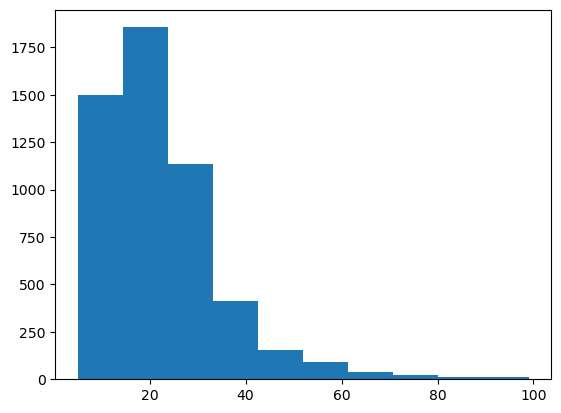

In [33]:
import matplotlib.pyplot as plt

# Plot a histogram of the lengths of training samples
plt.hist(data_length)
plt.show()

Initializes a `Tokenizer`, fits it on `training_data` and converts the texts to sequences of integers.

In [34]:
max_sequence_length=100

In [35]:
# Initialize a Tokenizer object
tokenizer = Tokenizer()

# Fit the Tokenizer to the training data to update its internal vocabulary
tokenizer.fit_on_texts(training_data)

# Convert the text data into sequences of tokens using the fitted tokenizer
sequences = tokenizer.texts_to_sequences(training_data)

# Calculate the vocabulary size by adding 1 to the length of the tokenizer's word index
# The +1 is for accommodating the padding token, which is typically added during tokenization
vocab_size = len(tokenizer.word_index) + 1

In [36]:
sequences

[[1, 2639, 1508, 12, 1916, 1509, 2639, 5, 2],
 [1, 19, 12, 2234, 2639, 5, 2],
 [1, 4159, 6, 310, 6244, 4, 12, 245, 5, 2],
 [1, 19, 245, 6245, 195, 3, 752, 90, 5, 2],
 [1, 3, 1354, 3, 119, 102, 7, 796, 5, 2],
 [1, 19, 245, 4159, 147, 7, 423, 5, 2],
 [1,
  6246,
  6247,
  6248,
  6249,
  6250,
  6251,
  6252,
  6253,
  6254,
  6,
  3216,
  6255,
  6,
  1122,
  6256,
  6,
  1122,
  6257,
  6,
  6258,
  2235,
  288,
  7,
  12,
  1510,
  1917,
  5,
  2],
 [1, 351, 55, 4, 4160, 1123, 14, 90, 6259, 503, 6, 4161, 3, 25, 4, 5, 2],
 [1, 6260, 458, 4, 503, 6, 6261, 3, 25, 4, 15, 5, 2],
 [1, 6262, 4162, 458, 4, 503, 6, 6263, 25, 4, 4160, 7, 876, 4, 15, 5, 2],
 [1, 1700, 1701, 12, 703, 5, 554, 376, 4163, 1918, 16, 352, 4, 7, 41, 2],
 [1,
  148,
  6264,
  51,
  6265,
  9,
  1355,
  5,
  32,
  6266,
  11,
  2640,
  10,
  531,
  31,
  3,
  2236,
  2641,
  73,
  13,
  2],
 [1,
  21,
  703,
  3,
  35,
  12,
  6267,
  2642,
  2643,
  1919,
  71,
  1033,
  1356,
  196,
  6268,
  11,
  6269,
  30,
  6270,


unique words that the tokenizer has learned from your training_data.

In [37]:
print(tokenizer.word_index)

{'start': 1, 'eos': 2, 'के': 3, 'में': 4, 'है': 5, 'comma': 6, 'की': 7, 'और': 8, 'का': 9, 'से': 10, 'को': 11, 'एक': 12, 'हैं': 13, 'पर': 14, 'भी': 15, 'ने': 16, 'किया': 17, 'था': 18, 'यह': 19, 'लिए': 20, 'इस': 21, 'गया': 22, 'कि': 23, 'जाता': 24, 'रूप': 25, 'ही': 26, 'नहीं': 27, 'जो': 28, 'हो': 29, 'कर': 30, 'करने': 31, 'तथा': 32, 'थे': 33, 'साथ': 34, 'द्वारा': 35, 'भारत': 36, 'या': 37, 'तक': 38, 'होता': 39, 'कुछ': 40, 'थी': 41, 'बाद': 42, 'हुआ': 43, 'अपने': 44, 'दिया': 45, 'वह': 46, 'करते': 47, 'करता': 48, 'तो': 49, 'राज्य': 50, 'एवं': 51, 'इसके': 52, 'होती': 53, 'जा': 54, 'समय': 55, 'कम': 56, 'वे': 57, 'कई': 58, 'अधिक': 59, 'अन्य': 60, 'प्रकार': 61, 'सकता': 62, 'बहुत': 63, 'व': 64, 'कारण': 65, 'नाम': 66, 'होते': 67, 'हुए': 68, 'सबसे': 69, 'जाती': 70, 'हुई': 71, 'उन्होंने': 72, 'गए': 73, 'अपनी': 74, 'प्रयोग': 75, 'कार्य': 76, 'किसी': 77, 'लेकिन': 78, 'होने': 79, 'वाले': 80, 'उनके': 81, 'भाग': 82, 'इन': 83, 'क्षेत्र': 84, 'जब': 85, 'दो': 86, 'भाषा': 87, 'दक्षिण': 88, 'कहा': 89, 'स्थित'

### Splitting into Predictors and Labels as sequence of words and its next corresponding word

In [38]:
X = []  # Initialize a list to store input sequences
y = []  # Initialize a list to store output sequences

# Iterate over each sequence in the list of token sequences
for sequence in sequences:
    # Iterate over each index in the sequence, except the last index
    for i in range(len(sequence) - 1):
        # Append the subsequence from the beginning to the current index (inclusive) to X
        X.append(sequence[:i+1])
        # Append the next token after the current index to y
        y.append(sequence[i+1])

In [39]:
X[:10], y[:10]

([[1],
  [1, 2639],
  [1, 2639, 1508],
  [1, 2639, 1508, 12],
  [1, 2639, 1508, 12, 1916],
  [1, 2639, 1508, 12, 1916, 1509],
  [1, 2639, 1508, 12, 1916, 1509, 2639],
  [1, 2639, 1508, 12, 1916, 1509, 2639, 5],
  [1],
  [1, 19]],
 [2639, 1508, 12, 1916, 1509, 2639, 5, 2, 19, 12])

In [40]:
# Pad the input sequences to ensure they all have the same length
# Sequences longer than max_sequence_length are truncated from the beginning,
# and sequences shorter than max_sequence_length are padded with zeros at the beginning
padded_X = pad_sequences(X, maxlen=max_sequence_length)

# Display the first 5 padded sequences
padded_X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [41]:
# Convert the list y into a NumPy array y2
y2 = np.array(y)

# Display the first 5 elements of the NumPy array y2
y2[:5]

array([2639, 1508,   12, 1916, 1509])

In [42]:
padded_X.shape, y2.shape

((111308, 100), (111308,))

# Load Embedding

### Load Pre-trained Embeddings

In [43]:
# Initialize an empty dictionary to store word embeddings
embeddings_index = {}

# Open the word embeddings file for reading
f = open('wiki.hi.vec', encoding='utf8')

try:
    # Iterate over each line in the file
    for line in f:
        # Split the line into tokens based on whitespace
        values = line.split()
        
        # Extract the word from the first token
        word = values[0]
        
        # Extract the word embeddings as a NumPy array from the remaining tokens
        coefs = np.asarray(values[1:], dtype='float32')
        
        # Store the word and its corresponding embeddings in the dictionary
        embeddings_index[word] = coefs
except:
    # Handle any exceptions by printing the error and the word causing the error
    print("Error in", values[0])

# Close the file after processing
f.close()

# Print the total number of word vectors found in the embeddings file
print('Found %s word vectors.' % len(embeddings_index))

error in  है।
Found 47425 word vectors.


### Prepare the Embedding Matrix

In [44]:
# Initialize an embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Iterate over each word in the tokenizer's word index
for word, i in tokenizer.word_index.items():
    # Get the embedding vector for the current word from the pre-trained embeddings dictionary
    embedding_vector = embeddings_index.get(word)
    
    # Check if the word index is within the vocabulary size
    if i < vocab_size:
        # If an embedding vector is found for the current word, update the corresponding row in the embedding matrix
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [45]:
embedding_matrix.shape

(14530, 300)

# RNN-LSTM Model for Text Generation

In [46]:
# Assign the value of vocab_size to the variable num_tokens
num_tokens = vocab_size

# Print the value of num_tokens
num_tokens

14530

**Model**

Embedding Layer:

- An Embedding layer is added as the first layer in the model.
- It maps each token index to a dense vector representation.
- The layer is initialized with pre-trained word embeddings and is made non-trainable (`trainable=False`) to keep the embeddings fixed during training.

LSTM Layer:

- A Long Short-Term Memory (LSTM) layer with 100 units is added after the Embedding layer.
- LSTM networks are capable of learning long-term dependencies in sequential data.

Dense Output Layer:

- A dense output layer is added with softmax activation.
- It predicts the probability distribution over the vocabulary for the next token.

Model Compilation:

- The model is compiled with sparse categorical cross-entropy loss and the Adam optimizer.
- It is ready to be trained on the data for text generation tasks.


In [47]:
from tensorflow.keras.layers import Embedding

# Initialize a sequential model
model = Sequential()

# Add an embedding layer with pre-trained embeddings
model.add(Embedding(
    num_tokens,  # Vocabulary size
    embedding_dim,  # Embedding dimension
    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),  # Initialize with pre-trained embeddings
    trainable=False,  # Freeze the embedding layer during training
))

# Add an LSTM layer with 100 units
model.add(LSTM(100))

# Add a dense output layer with softmax activation
model.add(Dense(vocab_size, activation='softmax'))

# Compile the model with sparse categorical cross-entropy loss and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         4359000   
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 14530)             1467530   
                                                                 
Total params: 5986930 (22.84 MB)
Trainable params: 1627930 (6.21 MB)
Non-trainable params: 4359000 (16.63 MB)
_________________________________________________________________


In [49]:
# Number of epochs
iterations=100

In [50]:
# Fit model to the prepared data
model.fit(padded_X, y2, batch_size=100, epochs=iterations)

Epoch 1/100


1114/1114 [==============================] - 104s 92ms/step - loss: 7.0027 - accuracy: 0.0827
Epoch 2/100
1114/1114 [==============================] - 100s 90ms/step - loss: 6.2395 - accuracy: 0.1391
Epoch 3/100
1114/1114 [==============================] - 100s 89ms/step - loss: 5.8237 - accuracy: 0.1577
Epoch 4/100
1114/1114 [==============================] - 100s 90ms/step - loss: 5.5108 - accuracy: 0.1699
Epoch 5/100
1114/1114 [==============================] - 100s 90ms/step - loss: 5.2374 - accuracy: 0.1818
Epoch 6/100
1114/1114 [==============================] - 100s 90ms/step - loss: 4.9896 - accuracy: 0.1910
Epoch 7/100
1114/1114 [==============================] - 100s 90ms/step - loss: 4.7586 - accuracy: 0.1986
Epoch 8/100
1114/1114 [==============================] - 99s 89ms/step - loss: 4.5432 - accuracy: 0.2073
Epoch 9/100
1114/1114 [==============================] - 100s 90ms/step - loss: 4.3432 - accuracy: 0.2153
Epoch 10/100
1114/1114 [=====================

## Save Model

In [51]:
# Save the Keras model to a file in the TensorFlow SavedModel format
tf.keras.saving.save_model(model, "hindi_tfrnn")

INFO:tensorflow:Assets written to: hindi_tfrnn\assets


INFO:tensorflow:Assets written to: hindi_tfrnn\assets


In [ ]:
# Save the model checkpoint
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="hindi_tfrnn.h5",
    save_weights_only=True,
    monitor="loss",
    save_best_only=True,
)

In [ ]:
# Train the model with the checkpoint callback
# model.fit(padded_X, y2, epochs=50, callbacks=[model_checkpoint_callback])

## Load Saved Model

In [52]:
# Load the saved model from the specified file path
# loaded_model = tf.keras.models.load_model("hindi_tfrnn")

## Generate Response with Variation

Generate a response with different variations based on the specified input parameter.

In [53]:
def generate_response(user_input, variation):
    # Convert the user input into a sequence of tokens
    input_sequence = tokenizer.texts_to_sequences([user_input])

    # Pad the input sequence to have the same length
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length - 1)

    # Predict the next word probabilities in the sequence
    predictions = model.predict(padded_input_sequence)[0]

    # Get the indices of the top predicted words
    top_indices = np.argpartition(predictions, -5)[-5:]

    # Sort the top indices in descending order based on predicted probabilities
    top_indices = top_indices[np.argsort(-predictions[top_indices])]

    # Convert the predicted indices back into words
    predicted_words = [tokenizer.index_word.get(index, '') for index in top_indices]

    # Return the word based on the specified variation (0 for most probable, 1 for second most probable, and so on)
    return predicted_words[variation]

In [54]:
length = 20  # Define the length of the variation array
variation = 0  # Define the variation value
variation_array = [variation] + [0] * (length - 1)  # Create the variation array

In [55]:
# Initialize the input and output strings
ip = "में"
op = ip

# Check if the input string is empty
if ip == "":
    ip = "start"

# Iterate over the range of the length variable
for i in range(length):
    # Generate the next word in the response based on the specified variation
    next_word = generate_response(ip, variation_array[i])
    
    # Append the next word to the input string
    ip += ' ' + next_word
    
    # Update the output string
    op += '\n' if next_word == 'eos' else ',' if next_word == 'comma' else ' ' + next_word

1/1 [==============================] - 0s 21ms/step


In [56]:
op

'में अग्रिम नतीजे विचारों में योग विभाजित होता है एवं इलाहाबाद के एक उत्तरपश्चिम पुनः में रहने के लिए सीट देती'

In [57]:
# Initialize the input and output strings
ip = "प्यार"
op = ip

# Check if the input string is empty
if ip == "":
    ip = "start"

# Iterate over the range of the length variable
for i in range(length):
    # Generate the next word in the response based on the specified variation
    next_word = generate_response(ip, variation_array[i])
    
    # Append the next word to the input string
    ip += ' ' + next_word
    
    # Update the output string
    op += '\n' if next_word == 'eos' else ',' if next_word == 'comma' else ' ' + next_word

1/1 [==============================] - 0s 23ms/step


In [58]:
op

'प्यार दोष सामान्यतया मार्च मार्च को इसे लाइन प्रकाश की होती है\n\n जिसे एक खिड़की के अंत में एक'